`scipy.integrate.quad_vec`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec, quad
import time
plt.style.use(['science', 'notebook'])

# Motivation

Suppose I have a function $f(x;a)$ where $x$ is some variable I want to integrate over and $a$ is some constant for the problem.
* For example, $a$ could be then length of a rod, the electric charge of an object, the voltage of a electric device, etc...

I want to compute $\int_{x_1}^{x_2} f(x;a)dx$ for many values of $a$.
* I could use the `quad` function: loop over all the different values of $a$ and run something like `[quad(f,x1,x2,args=(ai,)) for ai in a]`
* OR... (and this is much faster): the `quad_vec` function

# Coding

Create many different values of $a$

In [2]:
a = np.linspace(1,2,10000)

Define $f(x;a)$

In [3]:
def f(x,a):
    return np.exp(-a*x**2)

Use`quad_vec` to integrate:

In [4]:
quad_vec(f, -1, 3, args=(a,))[0]

TypeError: quad_vec() got an unexpected keyword argument 'args'

In [8]:
import scipy

In [ ]:
scipy.__versio

How does the timing compare to looping over the `quad` function for many different values of $a$?

Using `quad_vec`:

In [5]:
t1 = time.perf_counter()
# Take 10000 integrals
result = quad_vec(f, -1, 3, args=(a,))
t2 = time.perf_counter()
print(t2-t1)

TypeError: quad_vec() got an unexpected keyword argument 'args'

Looping over `quad`:

In [8]:
t1 = time.perf_counter()
# Take 10000 integrals
result = [quad(f,-1,3,args=(ai,)) for ai in a]
t2 = time.perf_counter()
print(t2-t1)

1.166376200000002


<span style="color: red;"> But what if there is more than one parameter? </span> Suppose we want to consider different combinations of $a$ and $b$:

* For example, $f(x;a,b)=e^{-a(x-b)^2}$

In [9]:
def f(x,a,b):
    return np.exp(-a*(x-b)**2)

Suppose these are the values we want to consider:

In [11]:
a = np.arange(1, 20, 1)
b = np.linspace(0,5,100)

Notice that $a$ and $b$ are different lengths. How do we find the integral for all possible combinations of $a$ and $b$?

In [14]:
av, bv = np.meshgrid(a,b)

Compute $\int_{-1}^{3} e^{-a(x-b)^2} dx$ for all the different $a$ and $b$ combinations

In [17]:
integral = quad_vec(f, -1, 3, args=(av,bv))[0]

Plot the result using `pcolormesh`

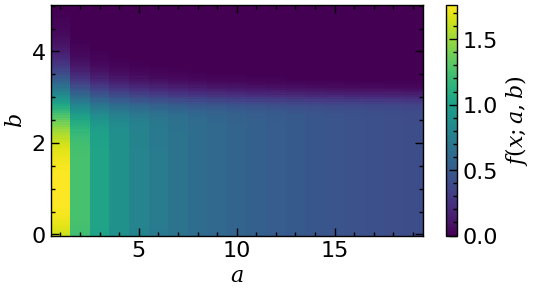

In [19]:
plt.figure(figsize=(6,3))
plt.pcolormesh(av,bv,integral)
plt.xlabel('$a$')
plt.ylabel('$b$')
plt.colorbar(label='$f(x;a,b)$')
plt.show()

<span style="color: red;"> What if the integration bounds depend on $a$? </span>

* For example $\int_{-a}^{a} e^{-(x/a)^2} dx$

Then it's probably best to include the bounds inside the function itself:

In [20]:
x=2

In [22]:
(x<1)*5

0

In [26]:
def f(x,a):
    return (x>=-a)*(x<=a)*np.exp(-a*x**2)

Define the different values of $a$ we want to integrate over:

In [27]:
a = np.arange(1, 20, 1)

Perform the integral

In [28]:
quad_vec(f, -np.inf, np.inf, args=(a,))

(array([1.49364827, 1.25323475, 1.02332671, 0.88622693, 0.79266546,
        0.72360125, 0.66992459, 0.62665707, 0.59081795, 0.56049912,
        0.53441494, 0.51166335, 0.49159025, 0.47370822, 0.45764562,
        0.44311346, 0.4298832 , 0.41777138, 0.4066288 ]),
 3.957322991329664e-09)